# _**Output of ADE**_

_Authors: Concetta D'Amato, Niccolò Tubini and Riccardo Rigon_



License: Creative Commons 4.0

## Before starting

The **output** are stored in [NetCDF](https://en.wikipedia.org/wiki/NetCDF). [Here](https://towardsdatascience.com/handling-netcdf-files-using-xarray-for-absolute-beginners-111a8ab4463f) an introduction on how to read a NetCDF file using the python library [xarray](http://xarray.pydata.org/en/stable/). The other output are stored as csv file. 

The **outputs** are:
- Water Suction
- Water Content

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
import math
import xarray as xr
import warnings
import plotly.graph_objects as go
import plotly.express as px


import pandas as pd
warnings.filterwarnings('ignore')
style.available
style.use('seaborn-whitegrid')
from GEOSPACE_Output import*

####### Plot settings #######
nice_fonts = {
    "legend.frameon": True, 
    "legend.fancybox": True, 
    "legend.facecolor": "white", 
    "axes.edgecolor": "0.8",
    "axes.linewidth": 0.6,
    "grid.linewidth":0.3,
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 16,
    "font.size": 16,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
}
plt.rcParams.update(nice_fonts)

project_path = os.path.dirname(os.getcwd())

In [5]:
os.chdir('/Users/concettadamato/Eclipse_workspace_12/LysGEO_NewAge/output/SpikeII')
#os.listdir()

In [6]:
file_name = 'OMS_SpikeIIwaterstress1805_00004LysGEO_0000.nc'

In [7]:
ds = xr.open_dataset(file_name,engine='scipy')
ds

<xarray.Dataset>
Dimensions:        (depth: 91, dualDepth: 91, time: 1272)
Coordinates:
  * depth          (depth) float64 -2.237 -2.212 -2.188 ... -0.0375 -0.0125 0.0
  * dualDepth      (dualDepth) float64 -2.25 -2.225 -2.2 ... -0.05 -0.025 0.0
  * time           (time) datetime64[ns] 2018-05-10T01:00:00 ... 2018-07-02
Data variables:
    psi            (time, depth) float64 ...
    psiIC          (depth) float64 ...
    T              (depth) float64 ...
    theta          (time, depth) float64 ...
    darcyVelocity  (time, dualDepth) float64 ...
    ets            (time, depth) float64 ...
    waterVolume    (time, depth) float64 ...
    error          (time) float64 ...
    topBC          (time) float64 ...
    bottomBC       (time) float64 ...
    runOff         (time) float64 ...
    controlVolume  (depth) float64 ...
Attributes:
    Description_of_the_problem:         \nInitial condition hydrostatic no po...
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom seepage
    path_top_boundary_condition:        data/SpikeII/Prec_Irrig_Height_hourly...
    path_bottom_boundary_condition:     data/SpikeII/SpikeII_0.csv
    path_grid:                          data/Grid_NetCDF/Grid_SpikeII_2909_02...
    time_delta:                          
    swrc_model:                         VG
    soil_hydraulic_conductivity_model:  Mualem VG no temperature
    interface_conductivity_model:       max

## Precipitation Timeseries

In [8]:
os.chdir(project_path+'/data/SpikeII')
#os.listdir()

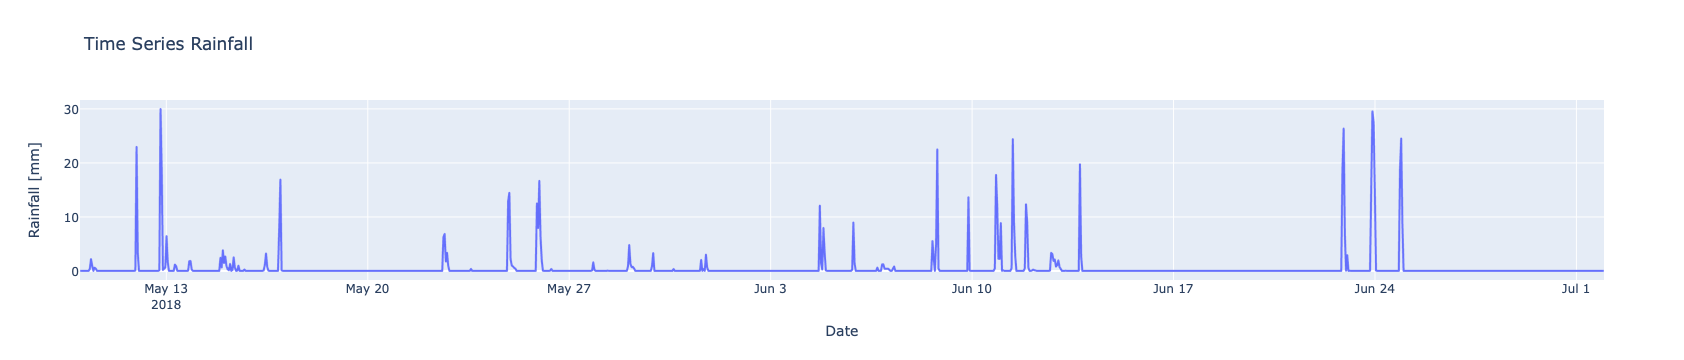

In [9]:
kl = pd.read_csv('Prec_Irrig_Height_hourly.csv' ,skiprows=6,parse_dates=[1])
kl = kl.drop(['Format'],axis=1) 
kl.columns.values[0] = 'Date'
kl.columns.values[1] = 'Rainfall [mm]' 
fig = px.line(kl, x='Date', y='Rainfall [mm]', title='Time Series Rainfall')
fig.show()

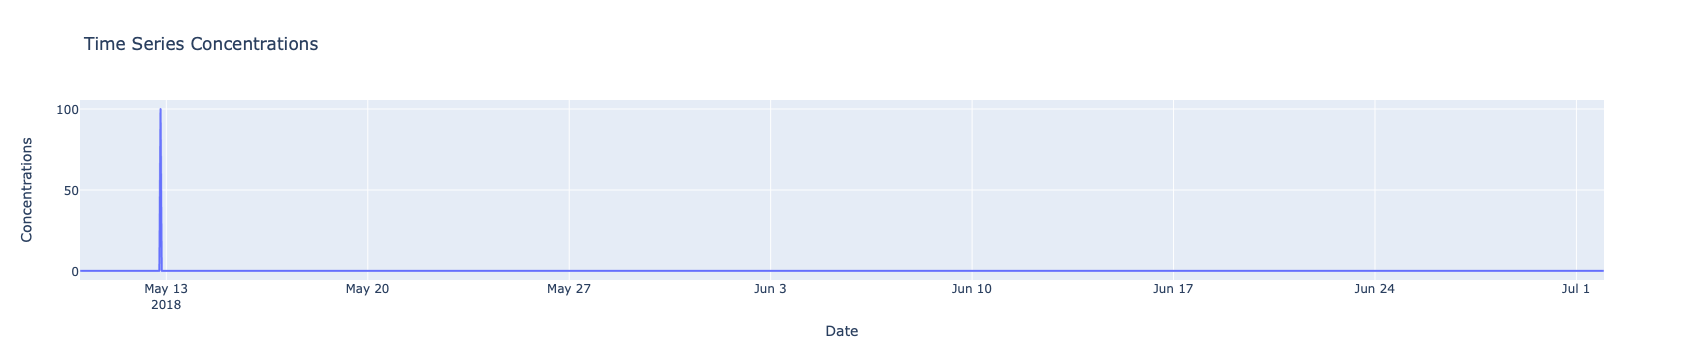

In [10]:
kl = pd.read_csv('ConcTopVarSpike100.csv' ,skiprows=6,parse_dates=[1])
kl = kl.drop(['Format'],axis=1) 
kl.columns.values[0] = 'Date'
kl.columns.values[1] = 'Concentrations' 
fig = px.line(kl, x='Date', y='Concentrations', title='Time Series Concentrations')
fig.show()

## Plot Error 

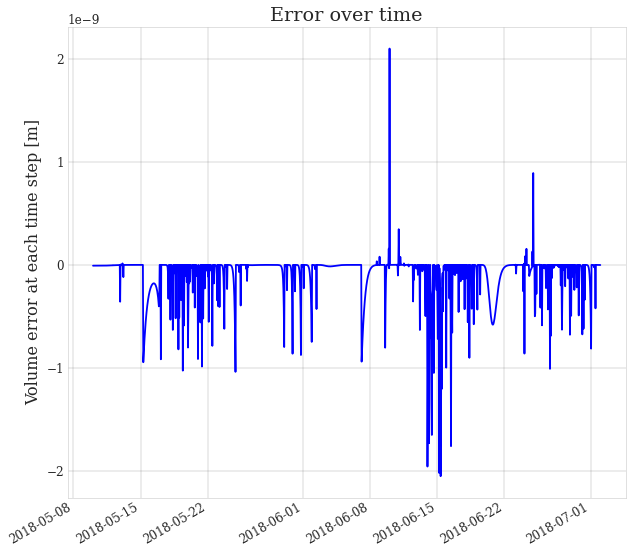

In [13]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds.error.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

In [12]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds.errorWaterVolumeConcentration.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

AttributeError: 'Dataset' object has no attribute 'errorWaterVolumeConcentration'

<Figure size 720x622.991 with 0 Axes>

## Plot Initial Condition 

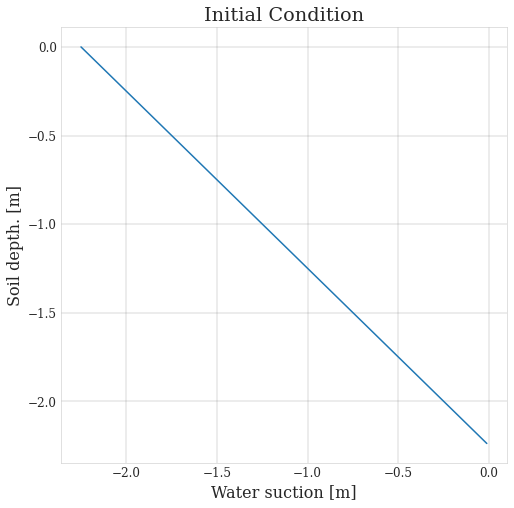

In [14]:
fig = plt.figure(figsize=(8,13/1.62))
ds.psiIC.plot(y='depth')
plt.xlabel('Water suction [m]')
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

In [15]:
fig = plt.figure(figsize=(8,13/1.62))
ds.concentrationIC.plot(y='depth')
plt.xlabel('Concentration')
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

AttributeError: 'Dataset' object has no attribute 'concentrationIC'

<Figure size 576x577.778 with 0 Axes>

 ### Water suction $\psi$ among the soil depth in your simulation  

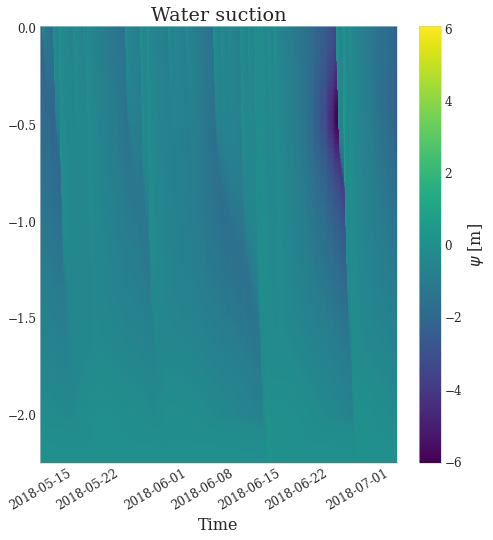

In [16]:
fig = plt.figure(figsize=(8,13/1.62))
ax = ds.psi.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water suction')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\psi$ [m]')

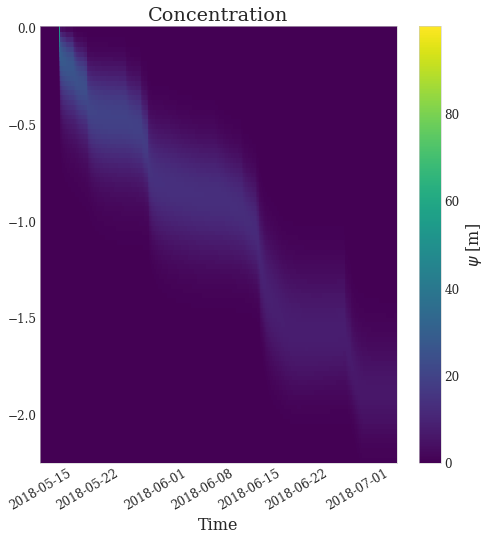

In [15]:
fig = plt.figure(figsize=(8,13/1.62))
ax = ds.concentrations.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Concentration')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\psi$ [m]')


<br>

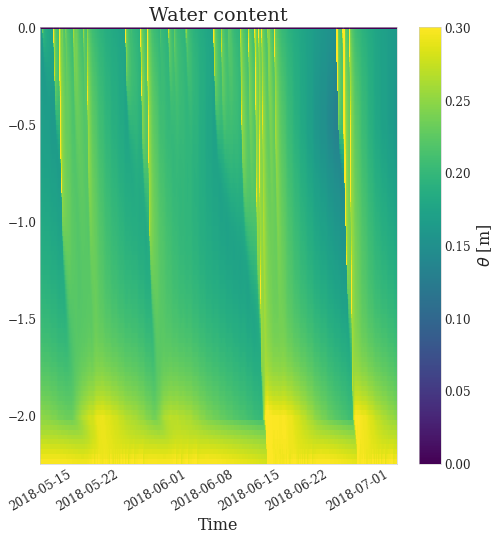

In [17]:
fig = plt.figure(figsize=(8,13/1.618))
ax = ds.theta.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water content')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\\theta$ [m]')


### Plot specifical depth

Define a vector of depth 'myDepth' you would plot 

In [18]:
myDepth = [-0.25,-0.75,-1.25,-1.75]
myDepth2 = [-0.10,-0.25,-0.50,-0.80,-1.50]

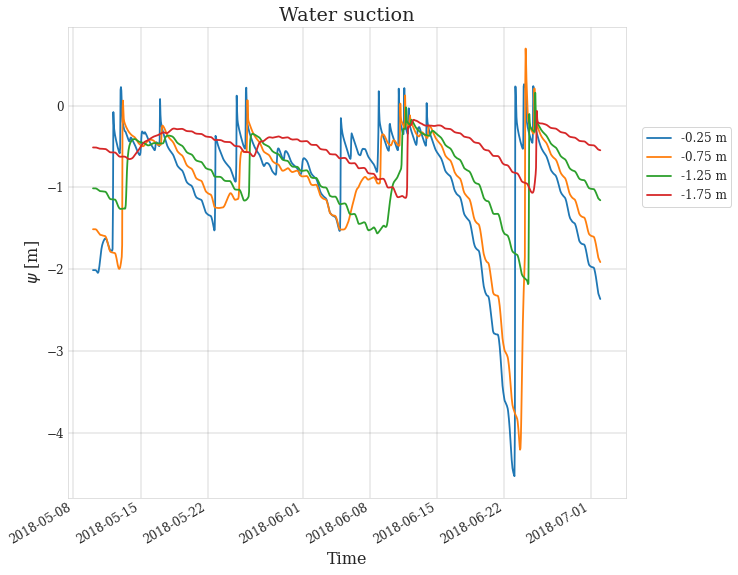

In [19]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.psi.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\psi$ [m]')
plt.xlabel('Time')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

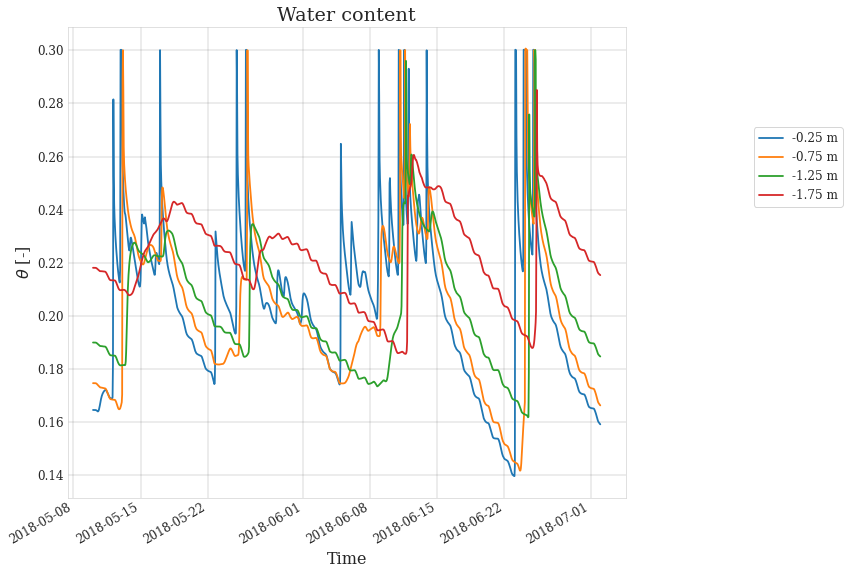

In [20]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.theta.where(ds.depth<0).sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\\theta$ [-]')
plt.xlabel('Time')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

In [21]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.concentrations.where(ds.depth<0).sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('')
plt.xlabel('Time')
plt.title('Concentration')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

AttributeError: 'Dataset' object has no attribute 'concentrations'

<Figure size 720x622.991 with 0 Axes>

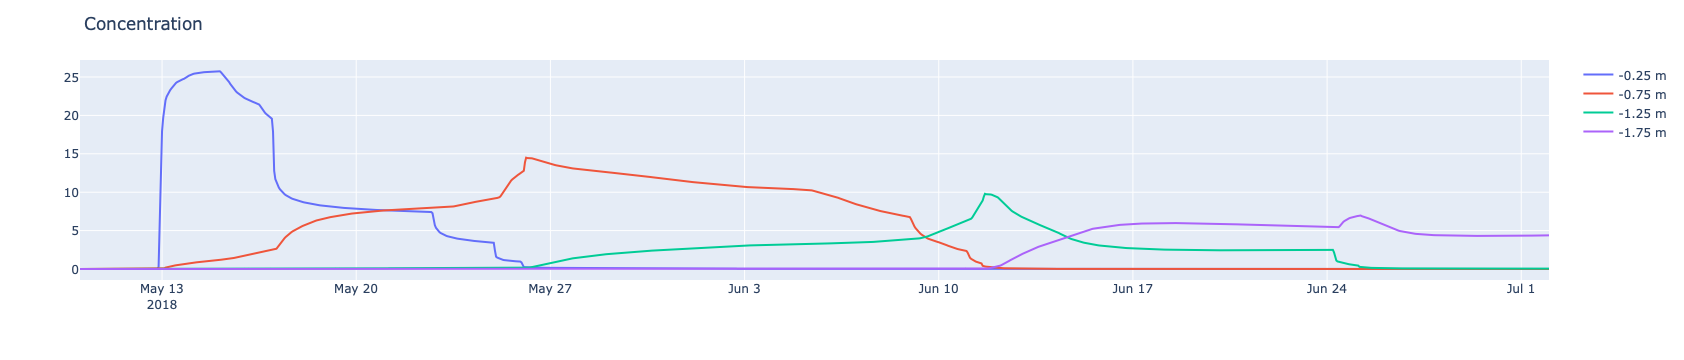

In [21]:
fig = px.line()
for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds.time.values[:], y=ds.concentrations.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]) , mode='lines', name=str(myDepth[i])+' m'))
    
fig.update_layout(title= 'Concentration')
fig.show()

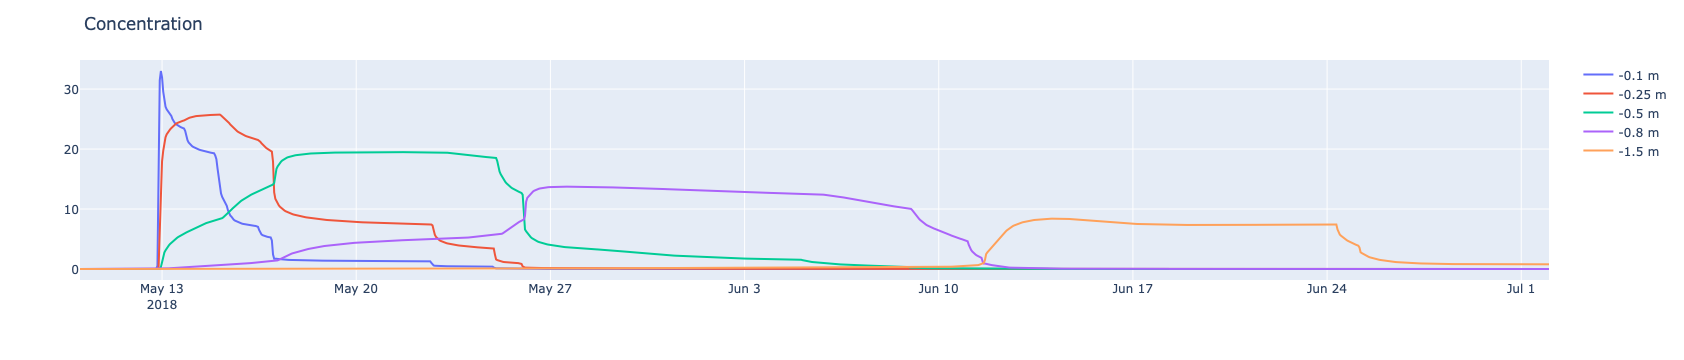

In [22]:
fig = px.line()
for i in range (0,len(myDepth2)):
    fig.add_trace(go.Scatter(x=ds.time.values[:], y=ds.concentrations.sel(depth=myDepth2[i], method='nearest', time=ds.time.values[:]) , mode='lines', name=str(myDepth2[i])+' m'))
    
fig.update_layout(title= 'Concentration')
fig.show()

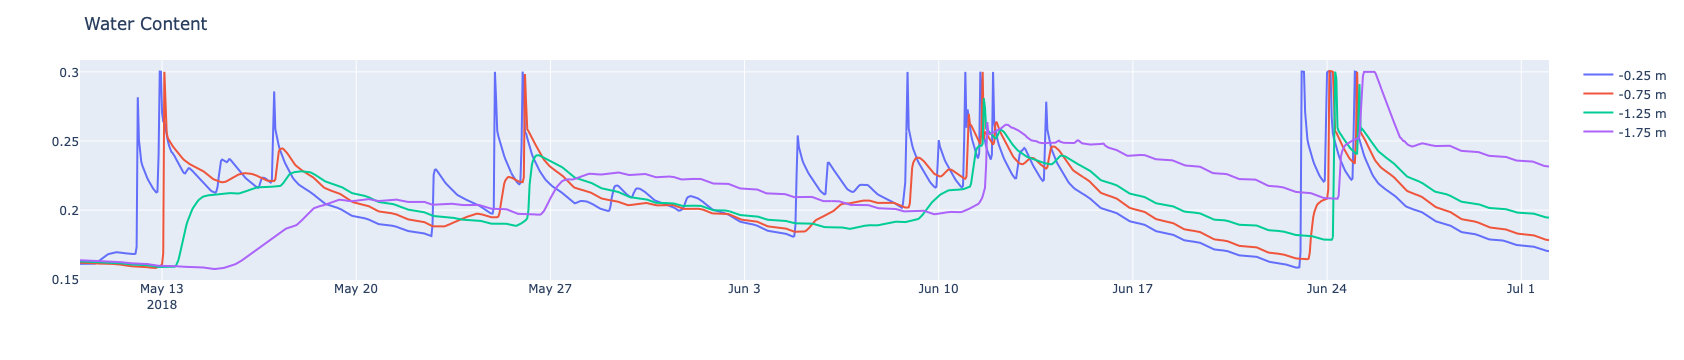

In [23]:
fig = px.line()
for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds.time.values[:], y=ds.theta.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]) , mode='lines', name=str(myDepth[i])+' m'))
    
fig.update_layout(title= 'Water Content')
fig.show()

### Plot specifical date
Define a vector of date 'myDate' you would plot 

In [22]:
myDate = ['2018-05-10 01:00','2018-05-20 01:00','2018-05-30 01:00','2018-06-10 01:00','2018-06-20 01:00','2018-06-30 01:00']

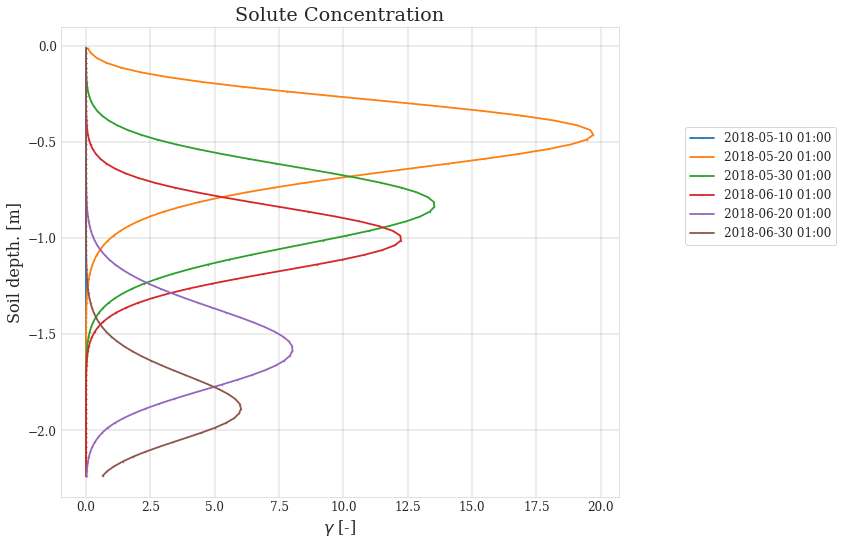

In [25]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.concentrations.sel(time=myDate[i],depth=ds.depth.values[0:len(ds.depth)-1]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\gamma $ [-]')
plt.title('Solute Concentration')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)
#save figure
#plt.savefig('WaterContent1_5.png', dpi=300, bbox_inches = "tight")

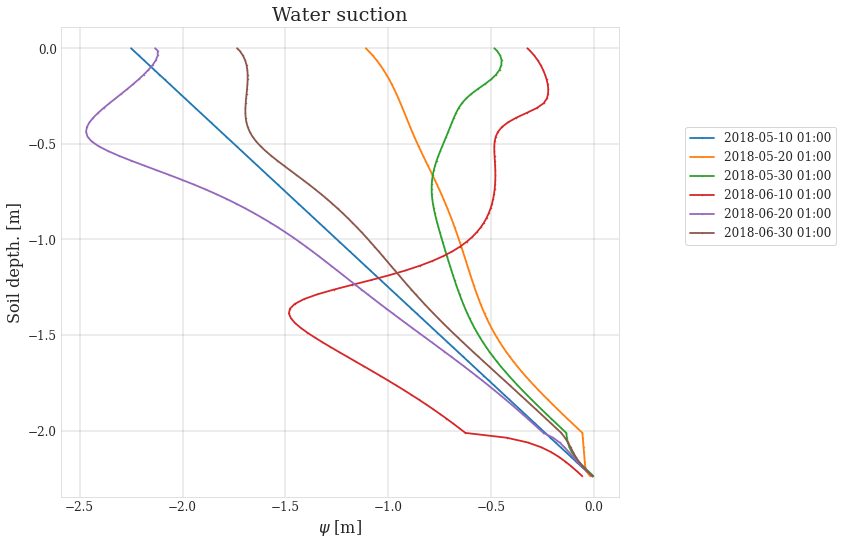

In [23]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.psi.sel(time=myDate[i]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\psi$ [m]')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

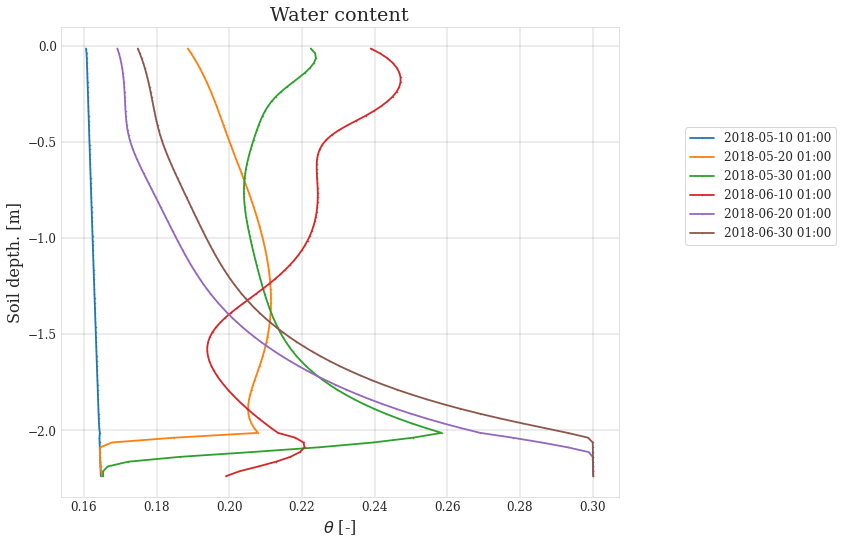

In [27]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.theta.sel(time=myDate[i],depth=ds.depth.values[0:len(ds.depth)-1]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\theta$ [-]')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

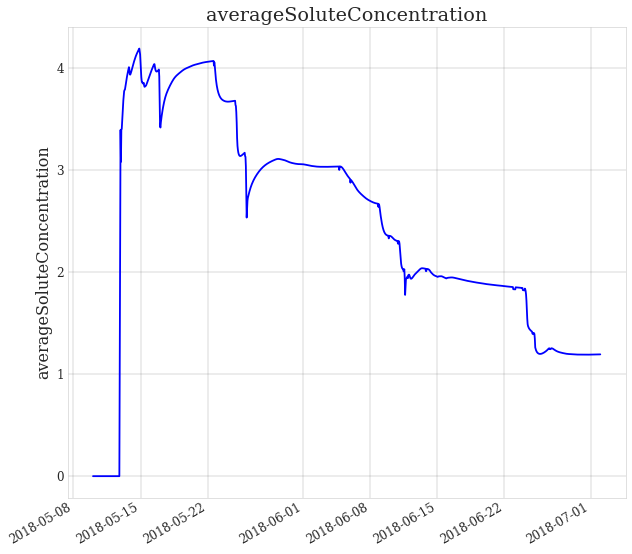

In [28]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds.averageSoluteConcentration.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('averageSoluteConcentration') 
plt.title('averageSoluteConcentration')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

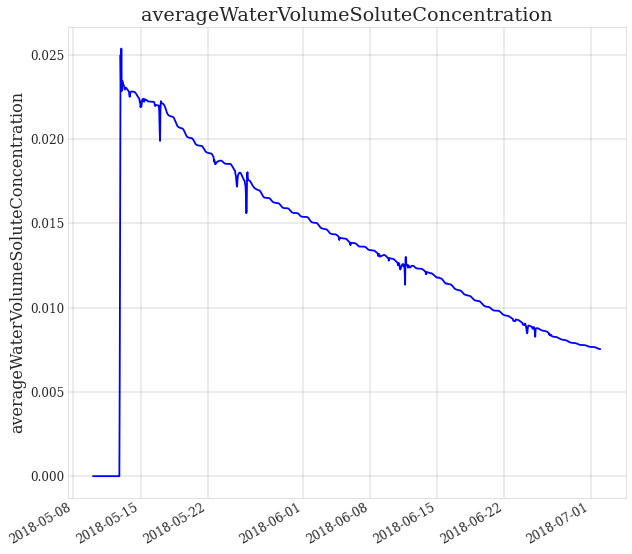

In [29]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds.averageWaterVolumeSoluteConcentration.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('averageWaterVolumeSoluteConcentration') 
plt.title('averageWaterVolumeSoluteConcentration')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot top-bottom flux 

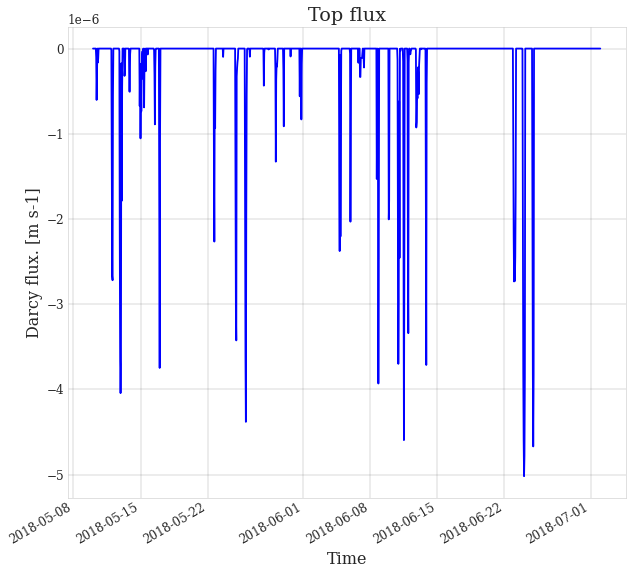

In [30]:
fig = plt.figure(figsize=(10,14/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[len(ds.dualDepth)-1], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Top flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

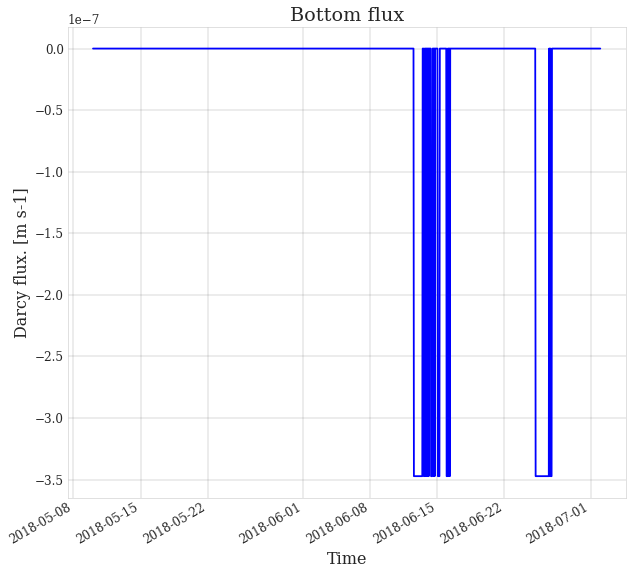

In [31]:
fig = plt.figure(figsize=(10,14/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[0], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Bottom flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

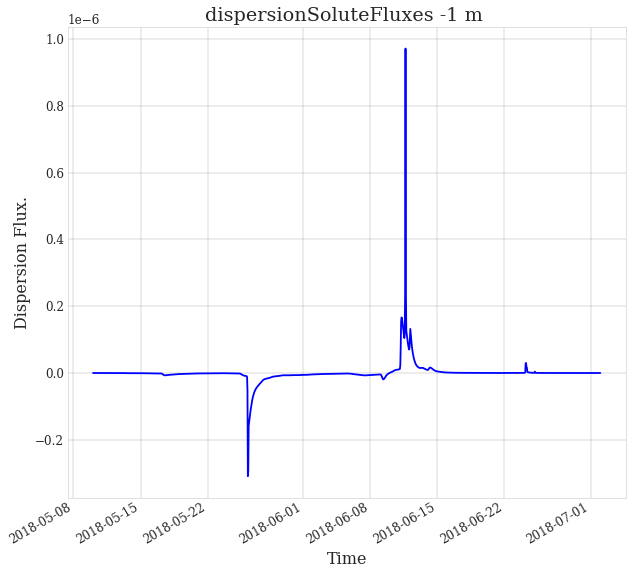

In [32]:
fig = plt.figure(figsize=(10,14/1.618))
ds.dispersionSoluteFluxes.sel(dualDepth=ds.dualDepth[50], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('dispersionSoluteFluxes -1 m ')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

In [33]:
ds.dualDepth[50]

<xarray.DataArray 'dualDepth' ()>
array(-1.)
Coordinates:
    dualDepth  float64 -1.0
Attributes:
    units:      m
    long_name:  Dual soil depth.

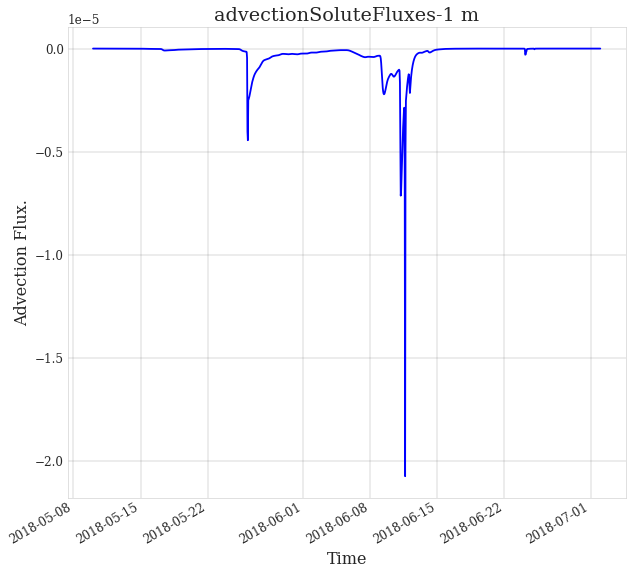

In [34]:
fig = plt.figure(figsize=(10,14/1.618))
ds.advectionSoluteFluxes.sel(dualDepth=ds.dualDepth[50], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('advectionSoluteFluxes-1 m')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

# Plot Evapotranspiration

In [35]:
os.chdir(project_path+'/output/SpikeII')
#os.listdir()

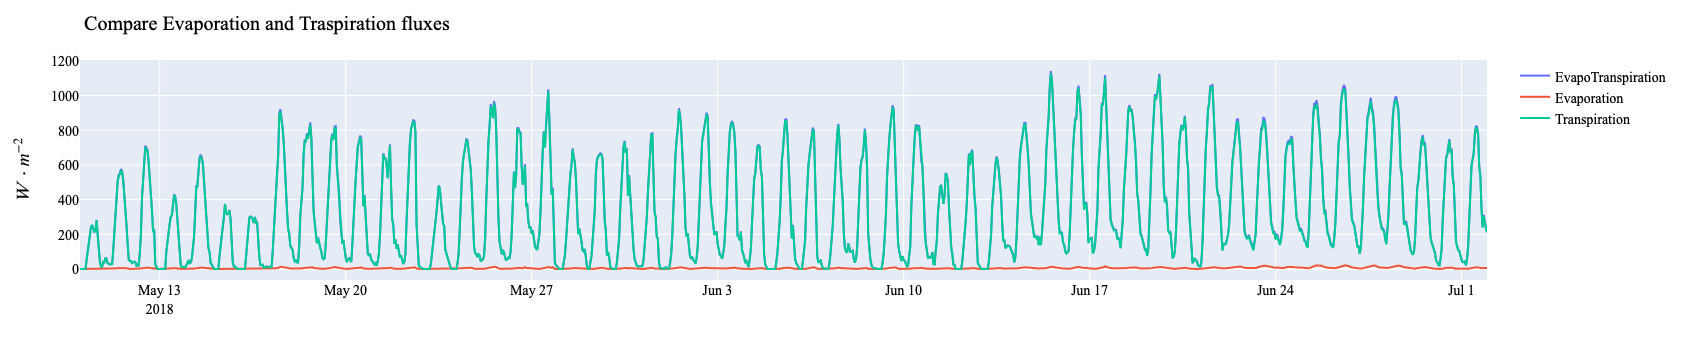

In [34]:
show_E_T('FluxEvapoTranspiration_SpikeADE_1805_03.csv','FluxEvaporation_SpikeADE_1805_03.csv','FluxTranspiration_SpikeADE_1805_03.csv')

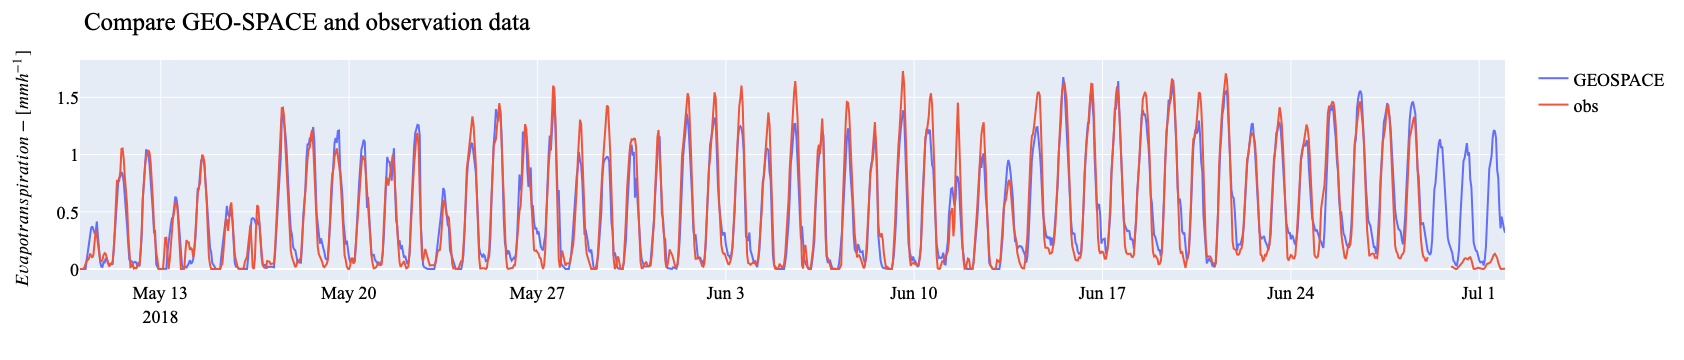

In [35]:
compare_sim_obs('EvapoTranspiration_SpikeADE_1805_03.csv','ET_hcum_hourly.csv')

In [36]:
df = pd.read_csv('EvapoTranspiration_SpikeADE_1805_03.csv',skiprows=6,parse_dates=[1])
df = df.drop(['Format'],axis=1) 
df.columns = ['Datetime','Evapotranspiration']
#df.set_index('Datetime',inplace=True)

In [37]:
df2 = pd.read_csv('ET_hcum_hourly.csv',skiprows=6,parse_dates=[1])
df2 = df2.drop(['Format'],axis=1) 
df2.columns = ['Datetime','Evapotranspiration']
#df.set_index('Datetime',inplace=True)

In [38]:
ETgeo= df.Evapotranspiration[0:1201].sum()
ETgeo

610.3056802315538

In [39]:
ETspike= df2.Evapotranspiration[0:1201].sum()
ETspike

612.542225

In [40]:
error=abs(((ETspike-ETgeo)/ETspike)*100)
error

0.3651249950068773